<a href="https://colab.research.google.com/github/ubaldinho/Hello_World/blob/main/TP_INTRUSION_%26_DDoS_DETECTION_USING_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part A : EXPLORATORY DATA ANALYSIS (EDA)

In [38]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# load the dataset
test_df = pd.read_csv('/content/testing_dataset_CIC_DDoS_2019.csv')
train_df = pd.read_csv('/content/training_dataset_CIC_DDoS_2019.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488041 entries, 0 to 488040
Data columns (total 86 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      488041 non-null  object 
 1   Source IP                    488041 non-null  object 
 2   Source Port                  488041 non-null  int64  
 3   Destination IP               488041 non-null  object 
 4   Destination Port             488041 non-null  int64  
 5   Protocol                     488041 non-null  int64  
 6   Timestamp                    488041 non-null  object 
 7   Flow Duration                488041 non-null  int64  
 8   Total Fwd Packets            488041 non-null  int64  
 9   Total Backward Packets       488041 non-null  int64  
 10  Total Length of Fwd Packets  488041 non-null  float64
 11  Total Length of Bwd Packets  488041 non-null  float64
 12  Fwd Packet Length Max        488041 non-null  float64
 13 

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110399 entries, 0 to 110398
Data columns (total 86 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      110399 non-null  object 
 1   Source IP                    110399 non-null  object 
 2   Source Port                  110399 non-null  int64  
 3   Destination IP               110399 non-null  object 
 4   Destination Port             110399 non-null  int64  
 5   Protocol                     110399 non-null  int64  
 6   Timestamp                    110399 non-null  object 
 7   Flow Duration                110399 non-null  int64  
 8   Total Fwd Packets            110399 non-null  int64  
 9   Total Backward Packets       110399 non-null  int64  
 10  Total Length of Fwd Packets  110399 non-null  float64
 11  Total Length of Bwd Packets  110399 non-null  float64
 12  Fwd Packet Length Max        110399 non-null  float64
 13 

In [41]:
train_df['Target'].value_counts()

,count
Target,
DDoS,440782
Benign,47259


In [42]:
train_df['Label'].value_counts()

,count
Label,
Syn,326782
BENIGN,47259
LDAP,40871
UDP,33083
MSSQL,24436
NetBIOS,15527
UDPLag,83


In [43]:
test_df['Target'].value_counts()

,count
Target,
DDoS,98942
Benign,11457


In [44]:
test_df['Label'].value_counts()

,count
Label,
UDPLag,30019
UDP,19163
MSSQL,17566
NetBIOS,14861
LDAP,14239
BENIGN,11457
Syn,3094


On the Train Dataset:
the Target shows a wide disparity between the 2 classes. DDoS is almost 10 times more then Beningn. This is an unbalanced dataset.
The Label shows that the counts are pretty balanced between multiplpes classes, A multiclass classification would be more balanced
On the Test Dataset:
For the Target & the Label, the data are unbalanced (more on the target)

In [45]:
# searching for missing values for each feature and counts them

for col in train_df.columns:
  print(col, train_df[col].isnull().sum())

Flow ID 0
Source IP 0
Source Port 0
Destination IP 0
Destination Port 0
Protocol 0
Timestamp 0
Flow Duration 0
Total Fwd Packets 0
Total Backward Packets 0
Total Length of Fwd Packets 0
Total Length of Bwd Packets 0
Fwd Packet Length Max 0
Fwd Packet Length Min 0
Fwd Packet Length Mean 0
Fwd Packet Length Std 0
Bwd Packet Length Max 0
Bwd Packet Length Min 0
Bwd Packet Length Mean 0
Bwd Packet Length Std 0
Flow Bytes/s 0
Flow Packets/s 0
Flow IAT Mean 0
Flow IAT Std 0
Flow IAT Max 0
Flow IAT Min 0
Fwd IAT Total 0
Fwd IAT Mean 0
Fwd IAT Std 0
Fwd IAT Max 0
Fwd IAT Min 0
Bwd IAT Total 0
Bwd IAT Mean 0
Bwd IAT Std 0
Bwd IAT Max 0
Bwd IAT Min 0
Fwd PSH Flags 0
Bwd PSH Flags 0
Fwd URG Flags 0
Bwd URG Flags 0
Fwd Header Length 0
Bwd Header Length 0
Fwd Packets/s 0
Bwd Packets/s 0
Min Packet Length 0
Max Packet Length 0
Packet Length Mean 0
Packet Length Std 0
Packet Length Variance 0
FIN Flag Count 0
SYN Flag Count 0
RST Flag Count 0
PSH Flag Count 0
ACK Flag Count 0
URG Flag Count 0
CWE Fla

In [46]:
# identifying categorical & numerical features

numerical_features = train_df.select_dtypes(include=['number']).columns
categorical_features = [col for col in train_df.columns if col not in numerical_features]

print('Numerical Features: ', numerical_features)
print('Categorical Features: ', categorical_features)

Numerical Features:  Index(['Source Port', 'Destination Port', 'Protocol', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length 

In [47]:
# identifying static features

static_features = [col for col in train_df.columns if train_df[col].nunique() == 1]
print('Static Features: ', static_features)
for col in static_features:
  print(col, train_df[col].unique())

Static Features:  ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'PSH Flag Count', 'ECE Flag Count', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
Bwd PSH Flags [0]
Fwd URG Flags [0]
Bwd URG Flags [0]
FIN Flag Count [0]
PSH Flag Count [0]
ECE Flag Count [0]
Fwd Avg Bytes/Bulk [0]
Fwd Avg Packets/Bulk [0]
Fwd Avg Bulk Rate [0]
Bwd Avg Bytes/Bulk [0]
Bwd Avg Packets/Bulk [0]
Bwd Avg Bulk Rate [0]


As constant values brings no information they have to be removed to improved the performance for computations

In [48]:
selected_features = [col for col in train_df.columns if col not in static_features]
print('Selected Features: ', selected_features)

Selected Features:  ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count', 'RST Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 

Flow ID , Source IP Destination IP & Timestamp represents identification features

As they are not relevant and can lead to bias through the training on the data. if an ID is always associated to Label, that id will seamlessly be identified as being from that class even if the context has changed  

In [49]:
id_features = ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']
print('ID Features: ', id_features)

ID Features:  ['Flow ID', 'Source IP', 'Destination IP', 'Timestamp']


In [50]:
# removing ID features
selected_features = [col for col in selected_features if col not in id_features]
print('Selected Features: ', selected_features)

Selected Features:  ['Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count', 'RST Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segmen

In [51]:
# searching for highly correlated features
selected_numerical_features = [col for col in numerical_features if col not in id_features]
corr_matrix = train_df[selected_numerical_features].corr().abs()
corr_matrix

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Source Port,1.000000,0.074006,0.215348,0.066792,0.000084,0.035966,0.162284,0.014442,0.376186,0.425484,...,0.052653,0.052996,0.029471,0.019046,0.026863,0.024311,0.075538,0.029911,0.070407,0.077555
Destination Port,0.074006,1.000000,0.030204,0.080134,0.009064,0.055265,0.046829,0.028276,0.004733,0.044697,...,0.055651,0.010710,0.061723,0.025246,0.049971,0.058829,0.085526,0.003093,0.071034,0.097512
Protocol,0.215348,0.030204,1.000000,0.175479,0.007168,0.036143,0.402704,0.010764,0.690913,0.734907,...,0.031224,0.180462,0.034620,0.053898,0.053968,0.011064,0.153229,0.130484,0.161837,0.134496
Flow Duration,0.066792,0.080134,0.175479,1.000000,0.026018,0.172414,0.112540,0.070923,0.024476,0.127568,...,0.334132,0.031120,0.231660,0.329383,0.338862,0.084390,0.859644,0.645802,0.889920,0.778846
Total Fwd Packets,0.000084,0.009064,0.007168,0.026018,1.000000,0.078264,0.025316,0.074664,0.004826,0.004083,...,0.062101,0.000735,0.017384,0.014221,0.018126,0.012174,0.023248,0.011718,0.022340,0.023019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Min,0.024311,0.058829,0.011064,0.084390,0.012174,0.141224,0.099843,0.117396,0.024066,0.015285,...,0.128978,0.003840,0.850910,0.039342,0.479436,1.000000,0.126976,0.034457,0.113252,0.136303
Idle Mean,0.075538,0.085526,0.153229,0.859644,0.023248,0.186755,0.117514,0.093546,0.010674,0.115000,...,0.323727,0.028112,0.240046,0.257074,0.267231,0.126976,1.000000,0.578205,0.977163,0.972502
Idle Std,0.029911,0.003093,0.130484,0.645802,0.011718,0.070777,0.001724,0.021226,0.072529,0.097381,...,0.188315,0.023999,0.166512,0.267044,0.237400,0.034457,0.578205,1.000000,0.727467,0.381752
Idle Max,0.070407,0.071034,0.161837,0.889920,0.022340,0.172071,0.095119,0.081491,0.029158,0.121282,...,0.319521,0.029705,0.241050,0.283438,0.285521,0.113252,0.977163,0.727467,1.000000,0.905551


In [52]:
# searching in the corr_matrix (upper the diagonal) the correlation values beyond a threshold (default 0.9) and keep the first one
corr_matrix = corr_matrix.abs()
threshold = 0.9
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > threshold)]
print('Highly correlated features: ', to_drop)

Highly correlated features:  ['Total Length of Bwd Packets', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Std', 'Bwd IAT Max', 'Fwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'RST Flag Count', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'min_seg_size_forward', 'Idle Mean', 'Idle Max', 'Idle Min']


Features with high correlation have almost the same explicability & information. A model trained without them carry the same amount of information and has the advantages of being lighter so improves computations performance while preserving the efficience of the model
We must remove them

In [53]:
selected_features = [col for col in selected_features if col not in to_drop]
print('Selected Features: ', selected_features)


Selected Features:  ['Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Bwd Packets/s', 'SYN Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Down/Up Ratio', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Std', 'Label', 'Target']


In [54]:
# update the dataset
train_df = train_df[selected_features]
test_df = test_df[selected_features]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488041 entries, 0 to 488040
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Source Port                  488041 non-null  int64  
 1   Destination Port             488041 non-null  int64  
 2   Protocol                     488041 non-null  int64  
 3   Flow Duration                488041 non-null  int64  
 4   Total Fwd Packets            488041 non-null  int64  
 5   Total Backward Packets       488041 non-null  int64  
 6   Total Length of Fwd Packets  488041 non-null  float64
 7   Fwd Packet Length Max        488041 non-null  float64
 8   Fwd Packet Length Std        488041 non-null  float64
 9   Bwd Packet Length Max        488041 non-null  float64
 10  Bwd Packet Length Min        488041 non-null  float64
 11  Bwd Packet Length Mean       488041 non-null  float64
 12  Flow Packets/s               488041 non-null  float64
 13 

In [55]:
# searching for duplicates
train_df.duplicated().sum()

np.int64(338)

Duplicates can mislead the weight in the dataser as they contribute to unbalance the dataset as well as adding a bias
also they can falsify the evaluation of the model during the test
So we remove them

In [56]:
# removing duplicates
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 487703 entries, 0 to 488040
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Source Port                  487703 non-null  int64  
 1   Destination Port             487703 non-null  int64  
 2   Protocol                     487703 non-null  int64  
 3   Flow Duration                487703 non-null  int64  
 4   Total Fwd Packets            487703 non-null  int64  
 5   Total Backward Packets       487703 non-null  int64  
 6   Total Length of Fwd Packets  487703 non-null  float64
 7   Fwd Packet Length Max        487703 non-null  float64
 8   Fwd Packet Length Std        487703 non-null  float64
 9   Bwd Packet Length Max        487703 non-null  float64
 10  Bwd Packet Length Min        487703 non-null  float64
 11  Bwd Packet Length Mean       487703 non-null  float64
 12  Flow Packets/s               487703 non-null  float64
 13  Flow

In [ ]:
# Feature importance : training a simple baseline model with random forest and check which features appears most important for prediction



## PART B : DATA PREPARATION

In [58]:
# import
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [59]:
# split the code between test & validate
train_set, validate_set = train_test_split(train_df, test_size=0.2, shuffle=True, random_state=42)

we split our train dataset into train & validate for preventing our model from overfitting. The idea is to evaluate the model during the training after every epoch
The test set is then used to evaluate after the training

The shuffle parameter is there to specify to perform a random distribution between the train & validate sets
if there are some sequence in the set to split, the shuflle will break it and then help preserve the proportions of the 2 splitted sets

In [73]:
ChosenEncoder = LabelEncoder()
for col in train_set.columns:
  if col in categorical_features:
    train_set[col] = ChosenEncoder.fit_transform(train_set[col])
    validate_set[col] = ChosenEncoder.transform(validate_set[col])
    test_df[col] = ChosenEncoder.transform(test_df[col])

In [74]:
print(train_set[[feat for feat in train_set.columns if feat not in numerical_features]].head())
train_set[[feat for feat in train_set.columns if feat not in numerical_features]].info()

        Label  Target
411536      0       0
327657      0       0
230639      0       0
473245      1       1
30250       0       0
        Label  Target
259467      0       0
366131      0       0
132217      0       0
147152      0       0
122239      0       0
<class 'pandas.core.frame.DataFrame'>
Index: 390162 entries, 411536 to 122239
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Label   390162 non-null  int64
 1   Target  390162 non-null  int64
dtypes: int64(2)
memory usage: 8.9 MB


Why Label Encoder ?

While One-hot Encoder is better suited for categorical classes with no prior order (nominal data) in multiclass neuronal context, Label Encoder is better for ordered classes (ordinal data) and binary context and also is memory + computationnal efficient


As we perform a binary classification we just have Label Encoding for the 'Target'

In [78]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in train_set.columns:
  if col in numerical_features:
    train_set[col] = scaler.fit_transform(train_set[col].values.reshape(-1, 1))
    validate_set[col] = scaler.transform(validate_set[col].values.reshape(-1, 1))
    test_df[col] = scaler.transform(test_df[col].values.reshape(-1, 1))

train_set.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Std,Bwd Packet Length Max,...,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,Active Mean,Active Std,Active Max,Active Min,Idle Std,Label,Target
411536,0.796221,1.254603,-0.591876,-0.291502,-0.009879,-0.070047,-0.306725,-0.459209,-0.130735,-0.127930,...,0.329412,-0.084175,-0.105853,-0.083732,-0.098889,-0.106809,-0.042539,-0.222989,0,0
327657,-0.875752,0.328054,-0.591876,-0.291502,-0.009879,-0.070047,-0.306725,-0.459209,-0.130735,-0.127930,...,0.329412,-0.084175,-0.105853,-0.083732,-0.098889,-0.106809,-0.042539,-0.222989,0,0
230639,-1.036759,0.790810,-0.591876,-0.291502,-0.009879,-0.070047,-0.306725,-0.459209,-0.130735,-0.127930,...,0.329412,-0.084175,-0.105853,-0.083732,-0.098889,-0.106809,-0.042539,-0.222989,0,0
473245,-1.563815,1.165074,-0.591876,-0.291496,-0.014939,0.010503,-0.310402,-0.459209,-0.130735,-0.104296,...,8.713923,18.839477,-0.197853,-0.083732,-0.098889,-0.106809,-0.042539,-0.222989,1,1
30250,-1.552911,1.166901,1.678385,-0.291502,-0.009879,-0.070047,1.490000,2.914224,-0.130735,-0.127930,...,-1.065142,-0.084175,-0.105853,-0.083732,-0.098889,-0.106809,-0.042539,-0.222989,0,0


## PART C : MODEL TRAINING AND VALIDATING

In [79]:
# imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [80]:
# training for random forests
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_set.drop('Target', axis=1), train_set['Target'])

# validation
y_pred = rf_model.predict(validate_set.drop('Target', axis=1))
print('Accuracy: ', accuracy_score(validate_set['Target'], y_pred))
print('Confusion Matrix: \n', confusion_matrix(validate_set['Target'], y_pred))
print('Classification Report: \n', classification_report(validate_set['Target'], y_pred))
print('Feature Importance: \n', rf_model.feature_importances_)
print('precision: ', precision_score(validate_set['Target'], y_pred))
print('recall: ', recall_score(validate_set['Target'], y_pred))
print('f1_score: ', f1_score(validate_set['Target'], y_pred))
print('ROC Curve: ', roc_curve(validate_set['Target'], y_pred))
print('AUC: ', roc_auc_score(validate_set['Target'], y_pred))

Accuracy:  1.0
Confusion Matrix: 
 [[88091     0]
 [    0  9450]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     88091
           1       1.00      1.00      1.00      9450

    accuracy                           1.00     97541
   macro avg       1.00      1.00      1.00     97541
weighted avg       1.00      1.00      1.00     97541

Feature Importance: 
 [2.36899387e-02 1.80881800e-01 7.46630286e-04 5.32547860e-03
 1.53611425e-03 6.79883342e-05 2.49442330e-02 8.48150557e-03
 9.65768643e-03 8.70847908e-02 2.48729144e-02 3.72502730e-02
 5.22351783e-03 1.58185516e-02 2.38601382e-04 5.23666570e-05
 1.30521364e-04 1.77199830e-03 1.29444915e-02 6.40169458e-04
 1.95266964e-03 3.65252971e-03 3.02277141e-04 8.84334412e-04
 9.32908773e-02 1.00125164e-02 2.36400804e-03 2.40422082e-02
 3.61734967e-02 2.80559557e-02 1.78035152e-04 8.87924385e-06
 4.80098379e-05 1.32080514e-03 3.99812971e-05 3.56313845e-01]
precision:

In [83]:
# compute feature importance and get the most important features
feature_importances = rf_model.feature_importances_
feature_names = train_set.drop('Target', axis=1).columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)

                        feature  importance
35                        Label    0.356314
1              Destination Port    0.180882
24               URG Flag Count    0.093291
9         Bwd Packet Length Max    0.087085
11       Bwd Packet Length Mean    0.037250
28      Init_Win_bytes_backward    0.036173
29             act_data_pkt_fwd    0.028056
6   Total Length of Fwd Packets    0.024944
10        Bwd Packet Length Min    0.024873
27       Init_Win_bytes_forward    0.024042
0                   Source Port    0.023690
13                Flow IAT Mean    0.015819
18                Fwd PSH Flags    0.012944
25               CWE Flag Count    0.010013
8         Fwd Packet Length Std    0.009658
7         Fwd Packet Length Max    0.008482
3                 Flow Duration    0.005325
12               Flow Packets/s    0.005224
21                Bwd Packets/s    0.003653
26                Down/Up Ratio    0.002364
20            Bwd Header Length    0.001953
17                  Bwd IAT Min 

In [81]:
# training for KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(train_set.drop('Target', axis=1), train_set['Target'])

#validation
y_pred = knn_model.predict(validate_set.drop('Target', axis=1))
print('Accuracy: ', accuracy_score(validate_set['Target'], y_pred))
print('Confusion Matrix: \n', confusion_matrix(validate_set['Target'], y_pred))
print('Classification Report: \n', classification_report(validate_set['Target'], y_pred))
print('precision: ', precision_score(validate_set['Target'], y_pred))
print('recall: ', recall_score(validate_set['Target'], y_pred))
print('f1_score: ', f1_score(validate_set['Target'], y_pred))
print('ROC Curve: ', roc_curve(validate_set['Target'], y_pred))
print('AUC: ', roc_auc_score(validate_set['Target'], y_pred))



Accuracy:  0.9997539496211849
Confusion Matrix: 
 [[88082     9]
 [   15  9435]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     88091
           1       1.00      1.00      1.00      9450

    accuracy                           1.00     97541
   macro avg       1.00      1.00      1.00     97541
weighted avg       1.00      1.00      1.00     97541

precision:  0.9990470139771284
recall:  0.9984126984126984
f1_score:  0.9987297554779295
ROC Curve:  (array([0.00000000e+00, 1.02167077e-04, 1.00000000e+00]), array([0.       , 0.9984127, 1.       ]), array([inf,  1.,  0.]))
AUC:  0.9991552656677357


In [82]:
# training for ADABOOST
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(train_set.drop('Target', axis=1), train_set['Target'])

# validation
y_pred = ada_model.predict(validate_set.drop('Target', axis=1))
print('Accuracy: ', accuracy_score(validate_set['Target'], y_pred))
print('Confusion Matrix: \n', confusion_matrix(validate_set['Target'], y_pred))
print('Classification Report: \n', classification_report(validate_set['Target'], y_pred))
print('precision: ', precision_score(validate_set['Target'], y_pred))
print('recall: ', recall_score(validate_set['Target'], y_pred))
print('f1_score: ', f1_score(validate_set['Target'], y_pred))
print('ROC Curve: ', roc_curve(validate_set['Target'], y_pred))
print('AUC: ', roc_auc_score(validate_set['Target'], y_pred))

Accuracy:  1.0
Confusion Matrix: 
 [[88091     0]
 [    0  9450]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     88091
           1       1.00      1.00      1.00      9450

    accuracy                           1.00     97541
   macro avg       1.00      1.00      1.00     97541
weighted avg       1.00      1.00      1.00     97541

precision:  1.0
recall:  1.0
f1_score:  1.0
ROC Curve:  (array([0., 0., 1.]), array([0., 1., 1.]), array([inf,  1.,  0.]))
AUC:  1.0


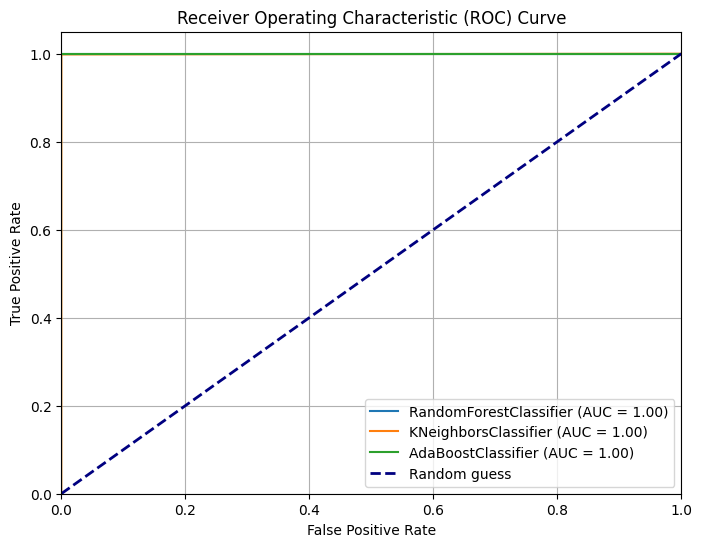

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred, fpr, tpr, roc_auc = [0 for x in range(3)], [0 for x in range(3)], [0 for x in range(3)], [0 for x in range(3)]
for i,model in enumerate([rf_model, knn_model, ada_model]):
  y_pred[i] = model.predict(validate_set.drop('Target', axis=1))
  # Calcul des valeurs de la courbe ROC
  fpr[i], tpr[i], _ = roc_curve(validate_set['Target'], y_pred[i])

  # Calcul de l’AUC (Area Under Curve)
  roc_auc[i] = auc(fpr[i], tpr[i])

# Tracé
plt.figure(figsize=(8,6))
for i,model in enumerate([rf_model, knn_model, ada_model]):
  plt.plot(fpr[i], tpr[i], label=f'{model.__class__.__name__} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Best Classifier :     

All three model performed very well on the validate set as the precision - recall - f1-score - accuracy are all near 1 or equal to one
Random Forest performed perfectly on the validate set as well as Adaboost but the best would be RandomForest because it's faster as it is a parrallel method so it performs faster for training

In [85]:
# using the best model on the test dataset which is the data of the next day

best_model = ada_model
#best_model.fit(train_set.drop('Target', axis=1), train_set['Target'])
y_pred = best_model.predict(test_df.drop('Target', axis=1))
print('Accuracy: ', accuracy_score(test_df['Target'], y_pred))
print('Confusion Matrix: \n', confusion_matrix(test_df['Target'], y_pred))
print('Classification Report: \n', classification_report(test_df['Target'], y_pred))
print('precision: ', precision_score(test_df['Target'], y_pred))
print('recall: ', recall_score(test_df['Target'], y_pred))
print('f1_score: ', f1_score(test_df['Target'], y_pred))
print('ROC Curve: ', roc_curve(test_df['Target'], y_pred))
print('AUC: ', roc_auc_score(test_df['Target'], y_pred))

Accuracy:  1.0
Confusion Matrix: 
 [[98936     0]
 [    0 11306]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     98936
           1       1.00      1.00      1.00     11306

    accuracy                           1.00    110242
   macro avg       1.00      1.00      1.00    110242
weighted avg       1.00      1.00      1.00    110242

precision:  1.0
recall:  1.0
f1_score:  1.0
ROC Curve:  (array([0., 0., 1.]), array([0., 1., 1.]), array([inf,  1.,  0.]))
AUC:  1.0


In [86]:
# using the best model on the test dataset which is the data of the next day

co_best_model = rf_model
#best_model.fit(train_set.drop('Target', axis=1), train_set['Target'])
y_pred = co_best_model.predict(test_df.drop('Target', axis=1))
print('Accuracy: ', accuracy_score(test_df['Target'], y_pred))
print('Confusion Matrix: \n', confusion_matrix(test_df['Target'], y_pred))
print('Classification Report: \n', classification_report(test_df['Target'], y_pred))
print('precision: ', precision_score(test_df['Target'], y_pred))
print('recall: ', recall_score(test_df['Target'], y_pred))
print('f1_score: ', f1_score(test_df['Target'], y_pred))
print('ROC Curve: ', roc_curve(test_df['Target'], y_pred))
print('AUC: ', roc_auc_score(test_df['Target'], y_pred))

Accuracy:  1.0
Confusion Matrix: 
 [[98936     0]
 [    0 11306]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     98936
           1       1.00      1.00      1.00     11306

    accuracy                           1.00    110242
   macro avg       1.00      1.00      1.00    110242
weighted avg       1.00      1.00      1.00    110242

precision:  1.0
recall:  1.0
f1_score:  1.0
ROC Curve:  (array([0., 0., 1.]), array([0., 1., 1.]), array([inf,  1.,  0.]))
AUC:  1.0


## COMMENTS
The precedent affirmation are confirmed on the test- dataset

# CONCLUSION : LESSONS LEARNED FROM APPLYING AI TO IDS

1. The overview of the distribution is primordial
2. The choice of the relevant features is the most important process to avoid training on an unconsistent dataset and lower the amount of datas/features to aim the sale performance
3. The choice of the encoding for categorical features is linked to the type of algorithm and the nature of the classes concerned. It's a matter of compromise
4. Carefully evaluate the models with different relevant metrics to choose the best fitting one
5. Avoid overfitting/underfitting of the model to ensure its utility in further datasets
6. Be aware of that the model might not perform as well on other datasets that contains new attacks Vectors with different characteristics
7. priority to the most catastrophic scenario to make a trade-off  

## PART D : DDoS ATTACKS IN 2024

### **1. What are the current commercial solutions used to detect denial of service (DoS) attacks?**
Some of the leading commercial DDoS detection and mitigation solutions in 2024 include:

- **Cloudflare DDoS Protection**
- **Radware DefensePro X**
- **AWS Shield & AWS WAF**
- **Azure DDoS Protection**
- **Imperva DDoS Protection**
- **Akamai Kona Site Defender**
- **Fastly DDoS Protection**
- **Prophaze WAF**
- **F5 Silverline DDoS Protection**
- **Orange cyberdefense**
- **6Cure**
- **Stormshield**


These solutions offer multi-layered protection, real-time traffic analysis, AI/ML-based anomaly detection, and automated mitigation.

---

### **2. What do we mean by scrubbing centers for DDoS detection?**
**Scrubbing centers** are specialized facilities or cloud-based services that **filter malicious traffic** during a DDoS attack. Here's how they work:

- **Traffic redirection**: During an attack, traffic is rerouted (via BGP or DNS) to the scrubbing center.
- **Traffic inspection**: The center analyzes traffic using deep packet inspection, behavioral analysis, and threat intelligence.
- **Filtering**: Malicious traffic is dropped; clean traffic is forwarded to the original destination.
- **Return to origin**: Cleaned traffic is sent back via GRE/IPsec tunnels.

Scrubbing centers are used by ISPs, enterprises, and cloud providers to mitigate volumetric and application-layer attacks.
like Orange Cyberdefense Cleanpipe.

---

### **3. Where are the solutions typically deployed?**
DDoS protection solutions are typically deployed in the following locations:

- **Cloud-based platforms** (e.g., Cloudflare, AWS Shield, Azure DDoS)
- **On-premises appliances** (e.g., Radware DefensePro)
- **At ISPs** (Bouygues, SFR, Orange)
- **Scrubbing centers** (global facilities for high-volume filtering) Cleanpipe, CELESTE, Akamai
- **Hybrid deployments** combining on-prem and cloud for layered defense

---

### **4. What is the average rate of HTTP DDoS attacks in 2024?**
In 2024, Cloudflare mitigated **21.3 million DDoS attacks**, averaging **4,870 attacks per hour**. HTTP DDoS attacks made up **51%** of these, meaning approximately **2,484 HTTP DDoS attacks per hour**.

---

### **5. What is the average duration of HTTP DDoS attacks reported in 2024?**
According to Cloudflare, **72% of HTTP DDoS attacks in 2024 lasted less than 10 minutes**, with only **3% lasting more than an hour**. Most attacks were **short-lived bursts**, emphasizing the need for **automated, real-time mitigation**.

---

### **6. What is the maximum rate of DDoS attacks reported in 2024?**
The **largest DDoS attack in 2024** reported by Cloudflare peaked at **5.6 Tbps** and was launched by a **Mirai-variant botnet** using over 13,000 IoT devices. It lasted **80 seconds** and targeted an ISP in Eastern Asia.

---

### **7. What are the emerging attack vectors?**
Emerging DDoS attack vectors in 2024 include:

- **Memcached amplification attacks** (+314% QoQ)
- **BitTorrent-based attacks** (+304% QoQ)
- **SSDP amplification** (noted 4,000% increase in Q3)
- **Browser impersonation** (e.g., fake Chrome user agents)
- **Volumetric cache-busting attacks**
- **Attacks targeting WordPress admin endpoints (/wp-admin/)**

These vectors reflect a shift toward **multi-vector, stealthy, and application-layer attacks**.
